In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('advertising.csv')
print(df.head())
print(df.tail())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
        TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


In [122]:
# print(df.isnull().sum())
columns = ["TV", "Radio", "Newspaper", "Sales"]
for column in columns:
  print((df[column] == 0).sum())

df["Radio"] = df["Radio"].replace(0, np.NaN).fillna(df.median())

0
0
0
0


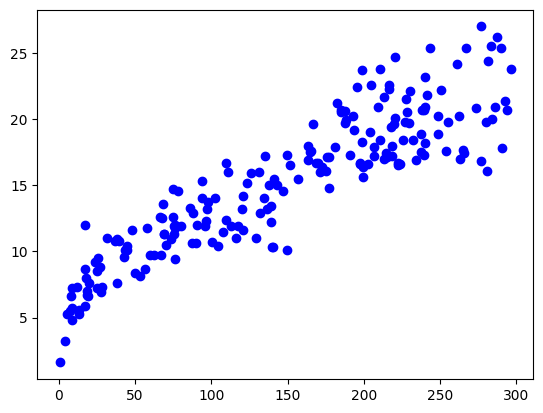

In [124]:
plt.scatter(df["TV"], df["Sales"], color='blue')

In [125]:
X = df[["TV"]]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(150, 1)


In [127]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


[20.28360396 13.01142049 10.35501536 11.05753573 19.14200837 12.10582783
 21.58436432 18.18701975  9.87203261 17.24849645 12.96202453 16.54597608
 22.53935295 17.08384323  7.39674601 11.12888545  7.33637317  7.86326344
 23.20345423 11.03558197 10.60748362 18.29130011 12.08936251  7.87972876
 11.06851261  8.31331555 20.09699699 17.78087516 15.25070416 18.99930892
  7.96754381  7.36381537 21.95757827 10.72274087 14.35608838 21.5130146
 14.59209131 18.50534929 16.09043553 12.96202453 12.57234526  8.34075775
 16.57890672 11.33744618 11.6393104  15.15191223 18.83465571  8.00047445
 23.0497779   7.65470271]


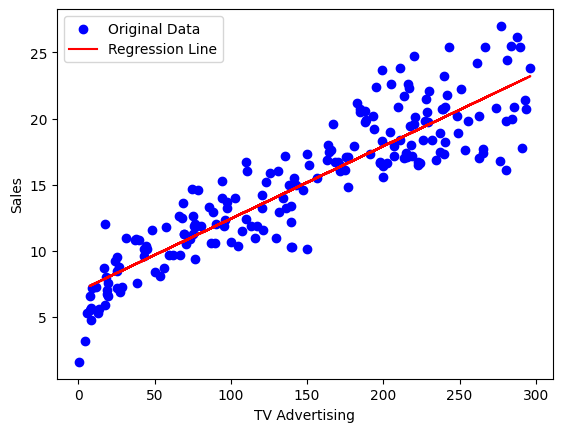

In [130]:
print(y_pred)

plt.scatter(df["TV"], df["Sales"], color='blue', label="Original Data")
plt.plot(X_test, y_pred, color='red', label="Regression Line")
plt.ylabel("Sales")
plt.xlabel("TV Advertising")
plt.legend()
plt.show()

In [133]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

print(np.sum(np.square(y_pred-y_test)))
print(model.coef_)
print(model.intercept_)

2.0351241916002563
5.979180698307732
0.8125264098595106
298.9590349153866
[0.0548844]
6.935717021134515


In [137]:
new_input = float(input("Enter advertising: "))
new_input = np.array(new_input).reshape(-1,1)
new_pred = model.predict(new_input)
print(new_pred[0])

Enter advertising: 230.1
19.56461827446975


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
